Importing the libraries

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

importing the dataset

In [17]:
# File path to the CSV file on your local machine
file_path = 'diabetes.csv'
# Read the CSV file into a pandas DataFrame
diabetes_data = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(diabetes_data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [18]:
#percentage
missing_values_percentage = diabetes_data.isnull().sum() / len(diabetes_data) * 100
print(missing_values_percentage)
dropping_columns = missing_values_percentage[missing_values_percentage > 30].index
reduced_data = diabetes_data.drop(columns=dropping_columns)
print(reduced_data.head())

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [19]:
X = reduced_data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = reduced_data['Outcome']
print("\nFeatures (X):")
print(X)# After removing the target variable in the table


Features (X):
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                     

Low varience

In [20]:
def apply_low_variance_filter(X, threshold=0.01):
    var_filter = VarianceThreshold(threshold=threshold)
    X_reduced = var_filter.fit_transform(X)
    return X_reduced

# Apply low variance filter and evaluate performance
X_low_var = apply_low_variance_filter(X)

# Split data for low variance model
X_train, X_test, y_train, y_test = train_test_split(X_low_var, y, test_size=0.2, random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
accuracy_low_var = accuracy_score(y_test, y_pred)
print(f"Accuracy after low variance filtering: {accuracy_low_var:.2f}")

Accuracy after low variance filtering: 0.72


High correlation

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.

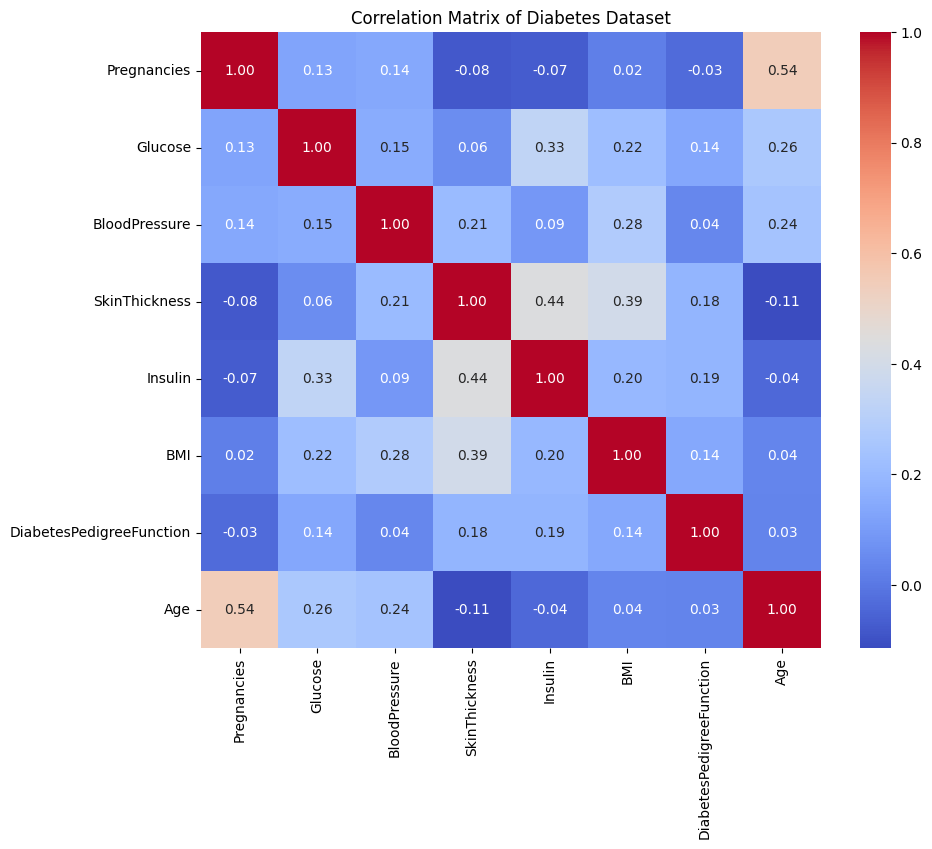


 Highly correlated features (correlation > 0.8) to be dropped:

Accuracy after removing highly correlated features: 0.72


In [21]:
correlation_matrix = X.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

# Function to remove highly correlated features
def remove_highly_correlated_features(X, threshold=0.8):
    corr_matrix = X.corr().abs()  # Calculate absolute correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Upper triangle matrix of correlations
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]  # Find columns to drop

    # Print the highly correlated pairs that are being dropped
    print("\n Highly correlated features (correlation > 0.8) to be dropped:")
    for column in to_drop:
        highly_corr = upper_tri.index[upper_tri[column] > threshold].tolist()
        for feature in highly_corr:
            print(f"{column} and {feature}: {corr_matrix.loc[column, feature]:.2f}")

    X_reduced = X.drop(columns=to_drop)  # Drop highly correlated features
    return X_reduced

# Remove highly correlated features
X_corr_reduced = remove_highly_correlated_features(X)

# Evaluate performance after removing correlated features
X_train, X_test, y_train, y_test = train_test_split(X_corr_reduced, y, test_size=0.2, random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = model_rf.predict(X_test)
accuracy_corr = accuracy_score(y_test, y_pred)
print(f"\nAccuracy after removing highly correlated features: {accuracy_corr:.2f}")

Forward Selection

In [22]:
def forward_feature_selection(X, y):
    model_lr = LogisticRegression(max_iter=1000)
    feature_selector = SelectKBest(k='all').fit(X, y)
    scores = feature_selector.scores_
    sorted_features = np.argsort(scores)[::-1]  # Sort features by score
    best_accuracy = 0
    best_num_features = 0
    for k in range(1, X.shape[1] + 1):
        X_selected = X.iloc[:, sorted_features[:k]]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        model_lr.fit(X_train, y_train)
        y_pred = model_lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_num_features = k
    return best_num_features, best_accuracy

best_num_features, accuracy_forward = forward_feature_selection(X, y)
print(f"Optimal number of features using forward selection: {best_num_features}, Accuracy: {accuracy_forward:.2f}")

Optimal number of features using forward selection: 2, Accuracy: 0.77


Backward Elimination

In [23]:
def backward_feature_elimination(X, y):
    model_dt = DecisionTreeClassifier(random_state=42)
    rfe = RFE(estimator=model_dt, n_features_to_select=1, step=1)
    rfe.fit(X, y)
    ranking = rfe.ranking_
    important_features = np.argsort(ranking)[:5]
    X_reduced = X.iloc[:, important_features]
    return X_reduced

X_backward_reduced = backward_feature_elimination(X, y)

# Evaluate performance after backward elimination
X_train, X_test, y_train, y_test = train_test_split(X_backward_reduced, y, test_size=0.2, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
accuracy_backward = accuracy_score(y_test, y_pred)
print(f"Accuracy after backward feature elimination: {accuracy_backward:.2f}")

Accuracy after backward feature elimination: 0.69


Random Forest

In [24]:
def feature_importance_random_forest(X, y):
    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X, y)
    importances = model_rf.feature_importances_
    indices = np.argsort(importances)[::-1][:5]  # Get indices of top 5 important features
    X_reduced = X.iloc[:, indices]
    return X_reduced, indices

X_rf_reduced, top_features = feature_importance_random_forest(X, y)

# Evaluate performance with top 5 features
X_train, X_test, y_train, y_test = train_test_split(X_rf_reduced, y, test_size=0.2, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
accuracy_rf_top5 = accuracy_score(y_test, y_pred)
print(f"Accuracy with top 5 important features: {accuracy_rf_top5:.2f}")

Accuracy with top 5 important features: 0.78
